In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
financials_df = pd.read_csv('/Users/markstansky/Desktop/Brainstation/Capstone/Sprint_3/Nov_25/sp500_financials.csv')

In [4]:
# drop extra index
financials_df.drop('Unnamed: 0',axis=1,inplace=True)

In [5]:
financials_df

,CIK_number,entity.name,report.sic-code,report.filing-date,SIC Code,Industry Title,dts.id,FY2022_Revenues,FY2022_NetIncomeLoss,FY2022_NetCashProvidedByUsedInOperatingActivities,...,FY2021_StockholdersEquity,FY2020_Revenues,FY2020_NetIncomeLoss,FY2020_NetCashProvidedByUsedInOperatingActivities,FY2020_NetCashProvidedByUsedInInvestingActivities,FY2020_NetCashProvidedByUsedInFinancingActivities,FY2020_CashAndCashEquivalentsAtCarryingValue,FY2020_Assets,FY2020_Liabilities,FY2020_StockholdersEquity
0,1099800,EDWARDS LIFESCIENCES CORPORATION,3842,2023-02-13,3842.0,"ORTHOPEDIC, PROSTHETIC & SURGICAL APPLIANCES &...",680698.0,5.382400e+09,1.521900e+09,1.218200e+09,...,5.835900e+09,4.386300e+09,8.234000e+08,1.054300e+09,-5.311000e+08,-4.869000e+08,1.183200e+09,7.237100e+09,2.662800e+09,4.574300e+09
1,1071739,CENTENE CORPORATION,6324,2023-03-24,6324.0,HOSPITAL & MEDICAL SERVICE PLANS,683117.0,1.445470e+11,1.202000e+09,6.261000e+09,...,2.679500e+10,1.111150e+11,1.808000e+09,5.503000e+09,-6.955000e+09,2.600000e+08,1.080000e+10,6.871900e+10,4.275700e+10,2.577300e+10
2,16918,"CONSTELLATION BRANDS, INC.",2080,2021-04-20,2080.0,BEVERAGES,581824.0,8.820700e+09,1.000000e+06,2.705400e+09,...,1.359890e+10,8.343500e+09,-1.180000e+07,2.551100e+09,-5.310000e+08,-2.031400e+09,8.140000e+07,2.732320e+10,1.484890e+10,1.213180e+10
3,1744489,WALT DISNEY CO/,7990,2021-11-24,7990.0,SERVICES-MISCELLANEOUS AMUSEMENT & RECREATION,664820.0,8.272200e+10,3.145000e+09,NaN,...,8.855300e+10,6.538800e+10,-2.864000e+09,NaN,NaN,NaN,1.791400e+10,2.015490e+11,NaN,8.358300e+10
4,865752,MONSTER BEVERAGE CORPORATION,2086,2023-03-01,2086.0,BOTTLED & CANNED SOFT DRINKS & CARBONATED WATERS,687658.0,6.311050e+09,1.191624e+09,8.876990e+08,...,6.566951e+09,4.598638e+09,1.409594e+09,1.364163e+09,-4.724870e+08,-5.260680e+08,1.180413e+09,6.202716e+09,NaN,5.160860e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,45012,HALLIBURTON COMPANY,1389,2022-02-04,1389.0,"OIL & GAS FIELD SERVICES, NEC",678806.0,2.029700e+10,1.595000e+03,2.242000e+09,...,6.713000e+09,1.444500e+10,-2.942000e+03,1.881000e+09,-4.860000e+08,-1.007000e+09,2.563000e+09,2.068000e+10,1.569700e+10,4.974000e+09
494,63754,MCCORMICK & CO INC,2090,2022-01-27,2090.0,MISCELLANEOUS FOOD PREPARATIONS & KINDRED PROD...,675770.0,6.350500e+09,6.820000e+08,6.515000e+08,...,4.411000e+09,5.601300e+09,7.474000e+08,1.041300e+09,-1.025600e+09,2.209000e+08,4.236000e+08,1.208970e+10,8.149700e+09,3.926100e+09
495,1170010,"CARMAX, INC.",5500,2022-04-14,5500.0,RETAIL-AUTO DEALERS & GASOLINE STATIONS,580144.0,3.190041e+10,1.151000e+06,-2.549450e+09,...,4.364613e+09,2.031999e+10,8.884330e+08,-2.366060e+08,-3.893640e+08,6.869830e+08,5.821100e+07,2.108218e+10,1.731331e+10,3.768875e+09
496,1097864,ON SEMICONDUCTOR CORP,3674,2022-02-14,3674.0,SEMICONDUCTORS & RELATED DEVICES,678427.0,8.326200e+09,1.902200e+09,2.633100e+09,...,4.585400e+09,5.255000e+09,2.342000e+08,8.843000e+08,-4.536000e+08,-2.440000e+08,1.080700e+09,8.668000e+09,5.109900e+09,3.538500e+09


# EDA Plan

I want to describe this dataset in several ways to better understand the nature of companies contained in the SPY.

1. Industry groups: who is represented here? How many belong to each industry?
    - What is their average revenue amount?
    - Stats for sovlency, leverage, industry growth
2. Who is included in the analysis (after we drop columns with nulls?
3. 

First, how many datapoints are there?

In [6]:
financials_df.shape

(498, 34)

In [9]:
financials_df['Industry Title'].value_counts()

REAL ESTATE INVESTMENT TRUSTS                      27
SEMICONDUCTORS & RELATED DEVICES                   17
SERVICES-PREPACKAGED SOFTWARE                      17
ELECTRIC SERVICES                                  16
SERVICES-BUSINESS SERVICES, NEC                    15
                                                   ..
REAL ESTATE OPERATORS (NO DEVELOPERS) & LESSORS     1
NEWSPAPERS: PUBLISHING OR PUBLISHING & PRINTING     1
RETAIL-WOMEN'S CLOTHING STORES                      1
REAL ESTATE                                         1
AIRCRAFT & PARTS                                    1
Name: Industry Title, Length: 182, dtype: int64

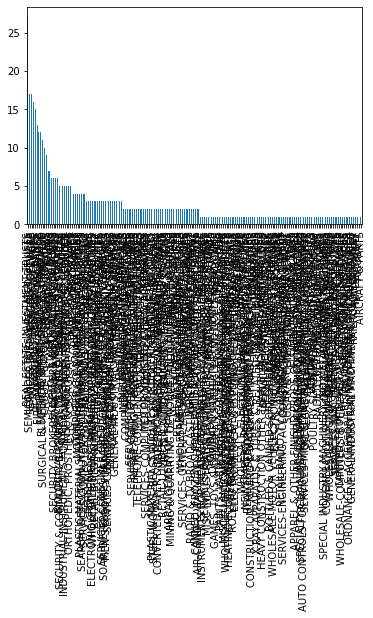

In [116]:
financials_df['Industry Title'].value_counts().sort_values(ascending=False).plot(kind='bar', stacked=True)

This is too many to see.  I will trim the sic code list so as to get smaller groupings of industries

In [23]:
financials_df['report.sic-code'].apply(str).str[:2].value_counts()

73    53
38    40
28    39
49    36
35    28
36    27
67    27
63    24
20    20
60    19
62    15
37    15
13    11
48     9
70     7
29     7
50     7
34     6
45     6
59     5
26     5
53     5
51     5
64     5
52     5
87     5
58     5
80     5
55     4
33     4
15     4
23     4
47     4
61     3
44     3
10     3
56     3
42     3
40     3
21     2
65     2
14     2
39     2
79     2
57     1
54     1
30     1
22     1
78     1
27     1
17     1
31     1
16     1
Name: report.sic-code, dtype: int64

In [28]:
# Making 2 dig cik column
financials_df['2_Dig_Cik'] = financials_df['report.sic-code'].apply(str).str[:2]

In [36]:
# Make it an int
financials_df['2_Dig_Cik'] = financials_df['2_Dig_Cik'].astype(int)

In [30]:
Two_Dig_CIK_df = pd.read_excel('/Users/markstansky/Desktop/Brainstation/Capstone/Sprint_3/Nov_26/sic_2_digit_codes.xls',header=2)

In [39]:
# Merge 
financials_df=financials_df.merge(Two_Dig_CIK_df[['Code Value','Description']],how='left',left_on='2_Dig_Cik',right_on='Code Value')

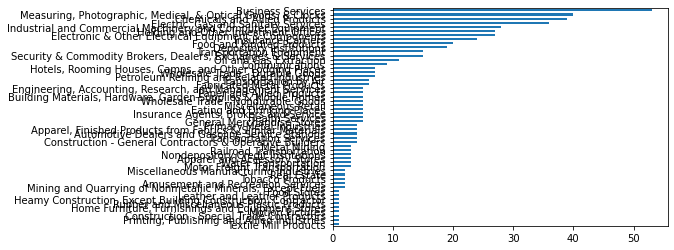

In [117]:
financials_df['Description'].value_counts().sort_values(ascending=True).plot(kind='barh',rot=0)

# should I limit the above to like the top 20? and include a count?

*** 
Moving onto financial data

In [47]:
financials_df.describe()

,CIK_number,report.sic-code,SIC Code,dts.id,FY2022_Revenues,FY2022_NetIncomeLoss,FY2022_NetCashProvidedByUsedInOperatingActivities,FY2022_NetCashProvidedByUsedInInvestingActivities,FY2022_NetCashProvidedByUsedInFinancingActivities,FY2022_CashAndCashEquivalentsAtCarryingValue,...,FY2020_NetIncomeLoss,FY2020_NetCashProvidedByUsedInOperatingActivities,FY2020_NetCashProvidedByUsedInInvestingActivities,FY2020_NetCashProvidedByUsedInFinancingActivities,FY2020_CashAndCashEquivalentsAtCarryingValue,FY2020_Assets,FY2020_Liabilities,FY2020_StockholdersEquity,2_Dig_Cik,Code Value
count,4.980000e+02,498.000000,497.000000,488.000000,4.870000e+02,4.960000e+02,4.840000e+02,4.860000e+02,4.890000e+02,4.980000e+02,...,4.920000e+02,4.910000e+02,4.930000e+02,4.950000e+02,4.950000e+02,4.960000e+02,3.420000e+02,4.980000e+02,498.000000,498.000000
mean,7.903466e+05,4758.343373,4767.716298,673525.155738,3.104285e+10,7.327599e+09,5.289299e+09,-3.333197e+09,-2.746211e+09,6.579027e+09,...,3.272121e+09,3.525001e+09,-4.129406e+09,3.296907e+09,7.125826e+09,7.587138e+10,7.855767e+10,1.672482e+10,47.196787,47.196787
std,5.504720e+05,1818.788320,1808.541383,22286.180470,6.136159e+10,6.322003e+10,1.156356e+10,1.066787e+10,1.386357e+10,3.456157e+10,...,3.085377e+10,9.303215e+09,1.857876e+10,3.505130e+10,3.565624e+10,2.342953e+11,2.833755e+11,3.621472e+10,18.071216,18.071216
min,1.800000e+03,100.000000,1000.000000,570296.000000,0.000000e+00,-7.344500e+10,-6.397000e+09,-1.378190e+11,-1.262570e+11,0.000000e+00,...,-6.710600e+10,-7.991000e+10,-2.619120e+11,-8.682000e+10,1.409000e+06,1.200102e+09,2.419040e+08,-1.831600e+10,10.000000,10.000000
25%,9.754325e+04,3563.000000,3569.000000,678083.750000,5.493500e+09,4.705000e+08,9.747500e+08,-3.098541e+09,-2.981000e+09,4.092500e+08,...,1.760938e+08,8.943885e+08,-2.653000e+09,-1.379200e+09,5.450000e+08,9.497962e+09,4.870369e+09,2.896000e+09,35.000000,35.000000
50%,8.853060e+05,4833.000000,4833.000000,682191.000000,1.245900e+10,1.154500e+09,2.127688e+09,-9.450000e+08,-1.017000e+09,1.213551e+09,...,7.004535e+08,1.724600e+09,-6.260000e+08,-2.894240e+08,1.420000e+09,2.127539e+10,1.297370e+10,6.443500e+09,48.000000,48.000000
75%,1.137785e+06,6324.000000,6324.000000,684600.750000,2.632210e+10,3.004000e+09,4.902500e+09,-2.547092e+08,-1.690000e+08,3.722250e+09,...,1.773000e+09,3.712650e+09,-2.020000e+08,5.046390e+08,3.711906e+09,5.401275e+10,4.007125e+10,1.530800e+10,63.000000,63.000000
max,1.868275e+06,8741.000000,8741.000000,691710.000000,5.727540e+11,1.090130e+12,1.221510e+11,3.204800e+10,1.377630e+11,5.672340e+11,...,5.570540e+11,8.067400e+10,1.225540e+11,5.966450e+11,5.276090e+11,3.384757e+12,3.105403e+12,4.431640e+11,87.000000,87.000000


In [51]:
# Grouping by SIC Industry (2-dig code) and looking at average revenue size, average equity, liablities
financials_df.groupby('Description')['FY2022_Revenues'].agg(['min','mean','max','std'])

,min,mean,max,std
Description,,,,
Amusement and Recreation Services,1.668125e+10,4.970163e+10,8.272200e+10,4.669786e+10
Apparel and Accessory Stores,7.882000e+09,2.511608e+10,4.855000e+10,2.103093e+10
"Apparel, Finished Products from Fabrics & Similar Materials",6.218500e+09,8.042854e+09,1.184184e+10,2.644913e+09
Automotive Dealers and Gasoline Service Stations,3.500921e+09,1.651586e+10,3.190041e+10,1.169869e+10
"Building Materials, Hardware, Garden Supplies & Mobile Homes",6.980600e+09,5.814824e+10,1.511570e+11,6.314168e+10
Business Services,1.246200e+09,2.071919e+10,2.828360e+11,4.837578e+10
Chemicals and Allied Products,1.105599e+09,2.551206e+10,1.003300e+11,2.518916e+10
Communications,1.397400e+10,6.715533e+10,1.368350e+11,4.891778e+10
Construction - General Contractors & Operative Builders,1.052643e+10,2.007848e+10,3.348000e+10,1.195117e+10


## Will make the above stats their own smaller dataframe and 

In [52]:
industry_stats=financials_df.groupby('Description')['FY2022_Revenues'].agg(['min','mean','max','std'])

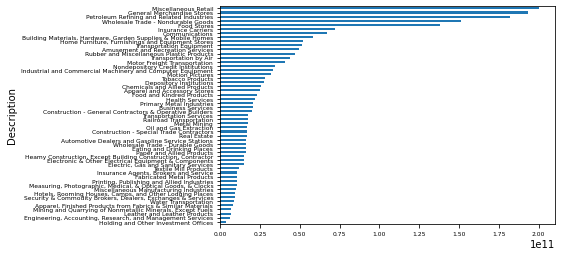

In [120]:
industry_stats['mean'].sort_values(ascending=True).plot(kind='barh',rot=0,fontsize=6)


# Cleaning to remove nulls

In [66]:
financials_df.isnull().sum()

CIK_number                                             0
entity.name                                            0
report.sic-code                                        0
report.filing-date                                     0
SIC Code                                               1
Industry Title                                         1
dts.id                                                10
FY2022_Revenues                                       11
FY2022_NetIncomeLoss                                   2
FY2022_NetCashProvidedByUsedInOperatingActivities     14
FY2022_NetCashProvidedByUsedInInvestingActivities     12
FY2022_NetCashProvidedByUsedInFinancingActivities      9
FY2022_CashAndCashEquivalentsAtCarryingValue           0
FY2022_Assets                                          0
FY2022_Liabilities                                    30
FY2022_StockholdersEquity                              1
FY2021_Revenues                                       10
FY2021_NetIncomeLoss           

In [89]:
# Reducing df where I don't have Starting Revenue
shorter_fin_df = financials_df[financials_df['FY2022_Revenues'].notnull()==True].copy()

In [90]:
shorter_fin_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 487 entries, 0 to 497
Data columns (total 37 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   CIK_number                                         487 non-null    int64  
 1   entity.name                                        487 non-null    object 
 2   report.sic-code                                    487 non-null    int64  
 3   report.filing-date                                 487 non-null    object 
 4   SIC Code                                           486 non-null    float64
 5   Industry Title                                     486 non-null    object 
 6   dts.id                                             477 non-null    float64
 7   FY2022_Revenues                                    487 non-null    float64
 8   FY2022_NetIncomeLoss                               485 non-null    float64
 9   FY2022_Net

### 2022 Liability Null Filling

In [92]:
# Take a look
shorter_fin_df[['FY2022_Liabilities','FY2022_Assets','FY2022_StockholdersEquity']].loc[shorter_fin_df['FY2022_Liabilities'].isnull()==True]

,FY2022_Liabilities,FY2022_Assets,FY2022_StockholdersEquity
46,NaN,17504000000,3.020000e+09
62,NaN,22192989000,9.419091e+09
89,NaN,13640256000,4.060050e+09
90,NaN,44114000000,1.074900e+10
114,NaN,16199500000,5.894800e+09
117,NaN,8147256000,3.308196e+09
131,NaN,26327371000,6.261986e+09
141,NaN,36821000000,1.970200e+10
149,NaN,38494000000,-3.025000e+09
192,NaN,13973500000,4.606600e+09


In [94]:
# Update
shorter_fin_df['FY2022_Liabilities'] = shorter_fin_df['FY2022_Liabilities'].fillna(shorter_fin_df['FY2022_Assets']-shorter_fin_df['FY2022_StockholdersEquity'])

# 2021 Liablities

In [98]:
# Take a look
shorter_fin_df[['FY2021_Liabilities','FY2021_Assets','FY2021_StockholdersEquity']].loc[shorter_fin_df['FY2021_Liabilities'].isnull()==True]

,FY2021_Liabilities,FY2021_Assets,FY2021_StockholdersEquity
3,NaN,203609000000,8.855300e+10
17,NaN,24156900000,6.947300e+09
24,NaN,57337805000,2.233540e+08
32,NaN,34027000000,1.641300e+10
33,NaN,32229000000,1.662200e+10
...,...,...,...
477,NaN,29254300000,1.167030e+10
479,NaN,75036000000,2.032700e+10
487,NaN,72045000000,2.598100e+10
488,NaN,37740000000,1.276700e+10


In [100]:
# Update
shorter_fin_df['FY2021_Liabilities'] = shorter_fin_df['FY2021_Liabilities'].fillna(shorter_fin_df['FY2021_Assets']-shorter_fin_df['FY2021_StockholdersEquity'])

# 2020 Liablities

In [103]:
# Take a look
shorter_fin_df[['FY2020_Liabilities','FY2020_Assets','FY2020_StockholdersEquity']].loc[shorter_fin_df['FY2020_Liabilities'].isnull()==True]

,FY2020_Liabilities,FY2020_Assets,FY2020_StockholdersEquity
3,NaN,2.015490e+11,8.358300e+10
4,NaN,6.202716e+09,5.160860e+09
5,NaN,1.623880e+11,4.796400e+10
17,NaN,2.204050e+10,5.752200e+09
18,NaN,1.344022e+10,3.204796e+09
...,...,...,...
479,NaN,8.006400e+10,1.857300e+10
481,NaN,7.254800e+10,3.278400e+10
487,NaN,6.662300e+10,2.337300e+10
488,NaN,3.134200e+10,8.055000e+09


In [104]:
# Update
shorter_fin_df['FY2020_Liabilities'] = shorter_fin_df['FY2020_Liabilities'].fillna(shorter_fin_df['FY2020_Assets']-shorter_fin_df['FY2020_StockholdersEquity'])

In [105]:
shorter_fin_df.isnull().sum()

CIK_number                                            0
entity.name                                           0
report.sic-code                                       0
report.filing-date                                    0
SIC Code                                              1
Industry Title                                        1
dts.id                                               10
FY2022_Revenues                                       0
FY2022_NetIncomeLoss                                  2
FY2022_NetCashProvidedByUsedInOperatingActivities    14
FY2022_NetCashProvidedByUsedInInvestingActivities    12
FY2022_NetCashProvidedByUsedInFinancingActivities     9
FY2022_CashAndCashEquivalentsAtCarryingValue          0
FY2022_Assets                                         0
FY2022_Liabilities                                    0
FY2022_StockholdersEquity                             1
FY2021_Revenues                                       1
FY2021_NetIncomeLoss                            

# Making a clean df to export to combine with bankruptcies

In [108]:
shorter_fin_df.notnull().all(1).sum()

448

In [112]:
clean_sp500_df = shorter_fin_df[shorter_fin_df.notnull().all(1)]

In [113]:
clean_sp500_df

,CIK_number,entity.name,report.sic-code,report.filing-date,SIC Code,Industry Title,dts.id,FY2022_Revenues,FY2022_NetIncomeLoss,FY2022_NetCashProvidedByUsedInOperatingActivities,...,FY2020_NetCashProvidedByUsedInOperatingActivities,FY2020_NetCashProvidedByUsedInInvestingActivities,FY2020_NetCashProvidedByUsedInFinancingActivities,FY2020_CashAndCashEquivalentsAtCarryingValue,FY2020_Assets,FY2020_Liabilities,FY2020_StockholdersEquity,2_Dig_Cik,Code Value,Description
0,1099800,EDWARDS LIFESCIENCES CORPORATION,3842,2023-02-13,3842.0,"ORTHOPEDIC, PROSTHETIC & SURGICAL APPLIANCES &...",680698.0,5.382400e+09,1.521900e+09,1.218200e+09,...,1.054300e+09,-5.311000e+08,-4.869000e+08,1.183200e+09,7.237100e+09,2.662800e+09,4.574300e+09,38,38,"Measuring, Photographic, Medical, & Optical Go..."
1,1071739,CENTENE CORPORATION,6324,2023-03-24,6324.0,HOSPITAL & MEDICAL SERVICE PLANS,683117.0,1.445470e+11,1.202000e+09,6.261000e+09,...,5.503000e+09,-6.955000e+09,2.600000e+08,1.080000e+10,6.871900e+10,4.275700e+10,2.577300e+10,63,63,Insurance Carriers
2,16918,"CONSTELLATION BRANDS, INC.",2080,2021-04-20,2080.0,BEVERAGES,581824.0,8.820700e+09,1.000000e+06,2.705400e+09,...,2.551100e+09,-5.310000e+08,-2.031400e+09,8.140000e+07,2.732320e+10,1.484890e+10,1.213180e+10,20,20,Food and Kindred Products
4,865752,MONSTER BEVERAGE CORPORATION,2086,2023-03-01,2086.0,BOTTLED & CANNED SOFT DRINKS & CARBONATED WATERS,687658.0,6.311050e+09,1.191624e+09,8.876990e+08,...,1.364163e+09,-4.724870e+08,-5.260680e+08,1.180413e+09,6.202716e+09,1.041856e+09,5.160860e+09,20,20,Food and Kindred Products
5,1326160,DUKE ENERGY CORPORATION,4911,2022-02-24,4911.0,ELECTRIC SERVICES,685855.0,2.876800e+10,2.550000e+09,5.927000e+09,...,8.856000e+09,-1.060400e+10,1.731000e+09,2.590000e+08,1.623880e+11,1.144240e+11,4.796400e+10,49,49,"Electric, Gas and Sanitary Services"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,45012,HALLIBURTON COMPANY,1389,2022-02-04,1389.0,"OIL & GAS FIELD SERVICES, NEC",678806.0,2.029700e+10,1.595000e+03,2.242000e+09,...,1.881000e+09,-4.860000e+08,-1.007000e+09,2.563000e+09,2.068000e+10,1.569700e+10,4.974000e+09,13,13,Oil and Gas Extraction
494,63754,MCCORMICK & CO INC,2090,2022-01-27,2090.0,MISCELLANEOUS FOOD PREPARATIONS & KINDRED PROD...,675770.0,6.350500e+09,6.820000e+08,6.515000e+08,...,1.041300e+09,-1.025600e+09,2.209000e+08,4.236000e+08,1.208970e+10,8.149700e+09,3.926100e+09,20,20,Food and Kindred Products
495,1170010,"CARMAX, INC.",5500,2022-04-14,5500.0,RETAIL-AUTO DEALERS & GASOLINE STATIONS,580144.0,3.190041e+10,1.151000e+06,-2.549450e+09,...,-2.366060e+08,-3.893640e+08,6.869830e+08,5.821100e+07,2.108218e+10,1.731331e+10,3.768875e+09,55,55,Automotive Dealers and Gasoline Service Stations
496,1097864,ON SEMICONDUCTOR CORP,3674,2022-02-14,3674.0,SEMICONDUCTORS & RELATED DEVICES,678427.0,8.326200e+09,1.902200e+09,2.633100e+09,...,8.843000e+08,-4.536000e+08,-2.440000e+08,1.080700e+09,8.668000e+09,5.109900e+09,3.538500e+09,36,36,Electronic & Other Electrical Equipment & Comp...


In [114]:
# Saving Down
clean_sp500_df.to_csv('/Users/markstansky/Desktop/Brainstation/Capstone/Sprint_3/Nov_26/clean_spy_data.csv')